In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("clean_labeled.csv")
df.head(10)

,Unnamed: 0,hostname,date,ping_jitter,ping_latency,ping_low,ping_high,day,predictions,basic_ema_anomaly,dspot_anomaly,tuned_dspot_anomaly
0,0,9cd30bf,2025-04-20 12:00:30,1.824,15.667,12.622,17.349,2025-04-20,False,False,False,False
1,1,b340432,2025-04-21 00:00:30,5.070,17.431,8.240,18.138,2025-04-21,False,False,True,False
2,2,b340432,2025-04-21 12:00:30,5.070,17.431,8.240,18.138,2025-04-21,False,False,True,False
3,4,9dc32f2,2025-04-22 12:00:30,8.191,11.906,8.095,21.929,2025-04-22,False,False,False,False
4,5,33fe84e,2025-04-23 03:00:24,1.036,13.099,12.911,14.710,2025-04-23,False,False,False,False
5,6,592a43c,2025-04-23 15:00:30,1.971,13.697,12.331,15.900,2025-04-23,False,False,False,False
6,7,38b6bf0,2025-04-24 03:00:30,1.276,8.031,7.480,11.690,2025-04-24,False,False,False,False
7,10,b5c8445,2025-04-25 15:00:30,1.560,17.572,15.803,19.353,2025-04-25,False,False,False,False
8,11,953d46d,2025-04-26 03:00:30,1.728,16.745,16.235,19.675,2025-04-26,False,False,False,False
9,16,7f6d63d,2025-04-28 18:00:30,2.183,12.508,11.773,16.269,2025-04-28,False,False,False,False


In [52]:
df["date"] = pd.to_datetime(df["date"])

In [53]:
df["date_ordinal"] = df["date"].apply(lambda x: x.toordinal())

In [54]:
df["label"] = df["predictions"].map({True: 1, False: -1})

In [55]:
hostname = "b340432" #df for one host
hdf = df #[df["hostname"] == hostname]
hdf

,Unnamed: 0,hostname,date,ping_jitter,ping_latency,ping_low,ping_high,day,predictions,basic_ema_anomaly,dspot_anomaly,tuned_dspot_anomaly,date_ordinal,label
0,0,9cd30bf,2025-04-20 12:00:30,1.824,15.667,12.622,17.349,2025-04-20,False,False,False,False,739361,-1
1,1,b340432,2025-04-21 00:00:30,5.070,17.431,8.240,18.138,2025-04-21,False,False,True,False,739362,-1
2,2,b340432,2025-04-21 12:00:30,5.070,17.431,8.240,18.138,2025-04-21,False,False,True,False,739362,-1
3,4,9dc32f2,2025-04-22 12:00:30,8.191,11.906,8.095,21.929,2025-04-22,False,False,False,False,739363,-1
4,5,33fe84e,2025-04-23 03:00:24,1.036,13.099,12.911,14.710,2025-04-23,False,False,False,False,739364,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28844,44764,b340432,2025-07-31 21:00:37,4.611,12.877,9.498,18.723,2025-07-31,False,False,False,False,739463,-1
28845,44765,a2e0486,2025-07-31 21:00:37,0.795,17.783,16.430,18.231,2025-07-31,False,False,False,False,739463,-1
28846,44766,953d46d,2025-07-31 21:00:38,2.457,13.381,12.142,16.663,2025-07-31,False,False,False,False,739463,-1
28847,44767,33fe84e,2025-07-31 21:00:42,3.244,11.808,9.115,14.302,2025-07-31,False,False,False,False,739463,-1


In [56]:
#process devices
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(hdf["hostname"])
# le.classes_
hdf["host_num"] = le.transform(np.array(hdf["hostname"]))
hdf["host_num"]


0        25
1        29
2        29
3        26
4         8
         ..
28844    29
28845    27
28846    21
28847     8
28848    35
Name: host_num, Length: 28849, dtype: int64

In [57]:
reg = hdf[hdf["predictions"] == False]
anomalies = hdf[hdf["predictions"] == True]

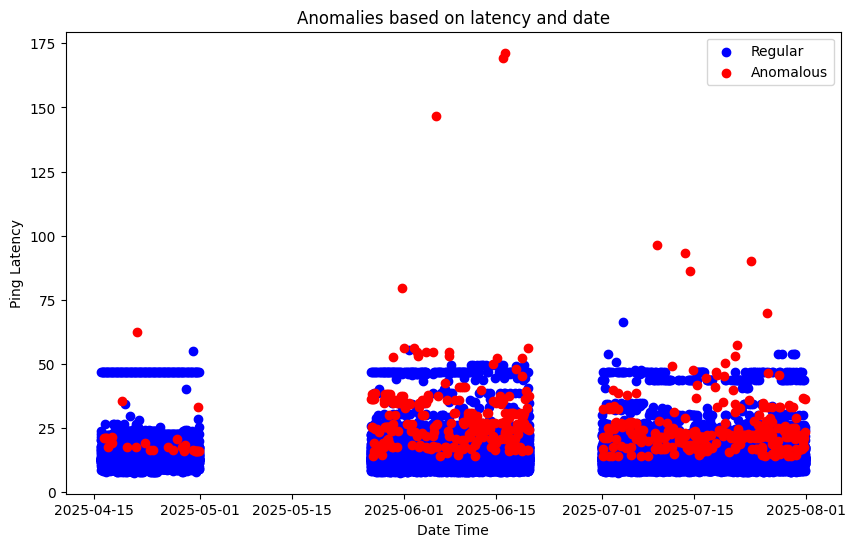

In [58]:
#for host name
plt.figure(figsize=(10, 6))
plt.title(f"Anomalies based on latency and date")
plt.xlabel("Date Time")
plt.ylabel("Ping Latency")
plt.scatter(reg["date"], reg["ping_latency"], color="blue", label="Regular")
plt.scatter(anomalies["date"], anomalies["ping_latency"], color="red", label="Anomalous")
plt.legend()
# plt.savefig(f"plots/latency-date.png")
plt.show()

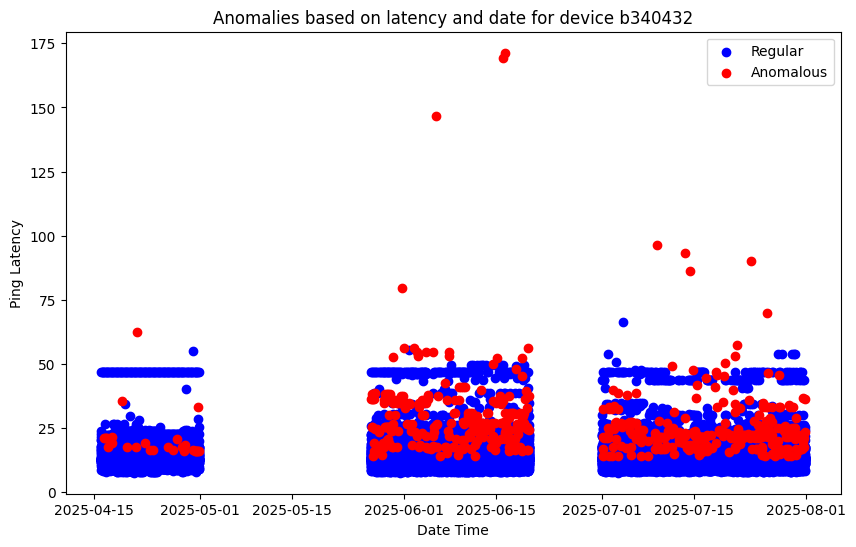

In [59]:
#Plot for hostname
plt.figure(figsize=(10, 6))
plt.title(f"Anomalies based on latency and date for device {hostname}")
plt.xlabel("Date Time")
plt.ylabel("Ping Latency")
plt.scatter(reg["date"], reg["ping_latency"], color="blue", label="Regular")
plt.scatter(anomalies["date"], anomalies["ping_latency"], color="red", label="Anomalous")
plt.legend()
# plt.savefig(f"plots/latency-date-{hostname}.png")
plt.show()

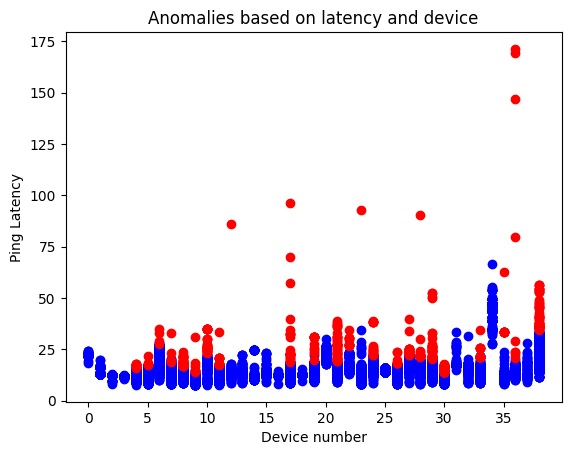

In [60]:
plt.title("Anomalies based on latency and device")
plt.xlabel("Device number")
plt.ylabel("Ping Latency")
plt.scatter(reg["host_num"], reg["ping_latency"], color="blue", label="Regular")
plt.scatter(anomalies["host_num"], anomalies["ping_latency"], color="red", label="Anomalous")
# plt.savefig("plots/latency-device.png")
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
#train test split
X = hdf[["ping_latency", "host_num"]] #"date_ordinal", 
y = hdf["label"]
X.shape, y.shape

((28849, 2), (28849,))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23079, 2), (5770, 2), (23079,), (5770,))

In [63]:
#attempt to learn w lin classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

models = [LogisticRegression(), LinearSVC()] #in case we want to automate model selection

clf = models[0]
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"f1 score: {f1}")

f1 score: 0.5123394185260312


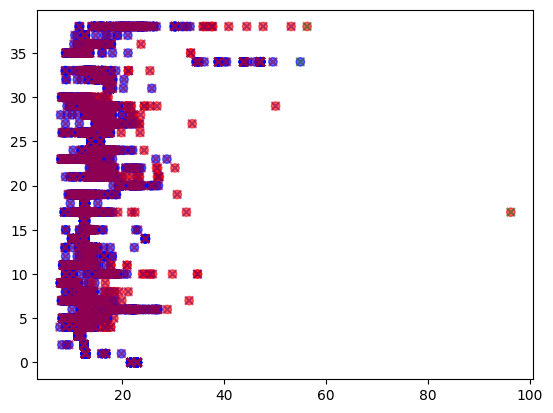

In [64]:
#plot results predicted anomalies

#train test
# plt.scatter(X_train["date"], X_train["ping_latency"], color="blue", label="")
plt.scatter(
    np.array(X_test)[:, 0], 
    np.array(X_test)[:, 1], 
    c=y_test,              # color by labels (1 or -1)
    cmap='bwr',             # blue = reg, red = anomalies
    alpha=0.6
)


plt.scatter(
    np.array(X_test)[:, 0], 
    np.array(X_test)[:, 1], 
    c=y_pred,              # color by labels (1 or -1)
    cmap='PiYG',             # pink x = pred reg, green x = pred anomalies
    alpha=0.6,
    marker ="x"
)
plt.show()